In [ ]:
import pandas as pd


,Name,UIN,Email
0,Danish Khan,653898374,mkhan354@uic.edu
1,Urvashiben Patel,656803288,upatel46@uic.edu
2,Saloni Kataria,662519005,skatar6@uic.edu
3,Pratibha Chitta,661448114,pchitt2@uic.edu


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import normalize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer


### Problem 1 - (a). Load The Train AND Test Datasets as DataFrame in Python

In [ ]:
# Inputting the word dictionary given as "words.map.txt"
mapping = pd.read_csv("words.map.txt", sep = "\t",  header=None, names=["Attributes"])
print(mapping)
np.array(mapping)

      Attributes
0        archive
1           name
2        atheism
3      resources
4            alt
...          ...
61183  aeroplane
61184     gosple
61185      ephas
61186   kltensme
61187     etrbom

[61188 rows x 1 columns]


array([['archive'],
       ['name'],
       ['atheism'],
       ...,
       ['ephas'],
       ['kltensme'],
       ['etrbom']], dtype=object)

In [ ]:
# train = pd.read_csv("articles.train")
# print(train)

In [ ]:
# Define a function to read the file and convert it into a dataframe
def loadthefile(filename):
  with open(filename) as datafile:
    count=0
    column=[len(mapping)-1]
    row=[0]
    df=[0]
    y=[]
    # For each line in the file, defining the row and column values
    for line in datafile:
      # Split your line into a list of words split by the space.
      elements = line.split(' ')
      
      # Read the very first element and the remaining ones as strings.
      label, features = elements[0], elements[1:]
      
      # Split the features and frequency into column and df; y = label 
      yA = [float(label)]
      columnA = [i.split(':', 1)[0] for i in elements[1:]]
      columnA = [int(x) - 1 for x in columnA]
      dfA = [i.split(':', 1)[1] for i in elements[1:]]
      dfA = [float(x) for x in dfA]
      rowA = [count]*(len(columnA))
      column = column + columnA
      df = df + dfA
      row = row + rowA
      y = y + yA
      count += 1
    
    y = np.array(y)
    X = (csr_matrix((df, (row, column))))
    return X,y

# Load the train data as X(indepedent variables) and Y(target variable) as a Dataframe
x_train, y_train = loadthefile('articles.train')
print(x_train)
print(x_train.shape)
print(y_train.shape)

  (0, 10)	2.0
  (0, 11)	6.0
  (0, 12)	1.0
  (0, 22)	12.0
  (0, 24)	1.0
  (0, 26)	2.0
  (0, 27)	1.0
  (0, 28)	8.0
  (0, 29)	4.0
  (0, 32)	2.0
  (0, 37)	1.0
  (0, 47)	1.0
  (0, 48)	1.0
  (0, 59)	3.0
  (0, 80)	5.0
  (0, 99)	3.0
  (0, 103)	3.0
  (0, 121)	3.0
  (0, 124)	2.0
  (0, 140)	1.0
  (0, 142)	1.0
  (0, 143)	5.0
  (0, 228)	1.0
  (0, 234)	2.0
  (0, 238)	1.0
  :	:
  (3999, 8935)	1.0
  (3999, 9291)	1.0
  (3999, 11317)	1.0
  (3999, 11353)	2.0
  (3999, 13584)	1.0
  (3999, 15216)	1.0
  (3999, 22522)	1.0
  (3999, 23310)	1.0
  (3999, 27608)	1.0
  (3999, 31930)	1.0
  (3999, 33311)	1.0
  (3999, 37131)	1.0
  (3999, 41457)	1.0
  (3999, 44460)	1.0
  (3999, 45514)	4.0
  (3999, 46529)	1.0
  (3999, 46901)	1.0
  (3999, 46902)	1.0
  (3999, 49498)	3.0
  (3999, 50583)	1.0
  (3999, 51016)	2.0
  (3999, 51856)	1.0
  (3999, 51857)	2.0
  (3999, 51947)	1.0
  (3999, 51948)	1.0
(4000, 61188)
(4000,)


In [ ]:
# Load the test data as X(indepedent variables) and Y(target variable) as a Dataframe
x_test, y_test = loadthefile('articles.test')
print(x_test.shape)
print(x_test)


(2400, 61188)
  (0, 11)	1.0
  (0, 22)	1.0
  (0, 28)	1.0
  (0, 29)	2.0
  (0, 32)	7.0
  (0, 34)	1.0
  (0, 43)	2.0
  (0, 59)	1.0
  (0, 79)	1.0
  (0, 103)	1.0
  (0, 143)	1.0
  (0, 232)	3.0
  (0, 278)	1.0
  (0, 367)	1.0
  (0, 431)	1.0
  (0, 448)	1.0
  (0, 473)	2.0
  (0, 475)	1.0
  (0, 476)	1.0
  (0, 629)	2.0
  (0, 741)	1.0
  (0, 765)	1.0
  (0, 769)	1.0
  (0, 774)	2.0
  (0, 777)	1.0
  :	:
  (2399, 5625)	1.0
  (2399, 6377)	1.0
  (2399, 7265)	2.0
  (2399, 7273)	3.0
  (2399, 7274)	8.0
  (2399, 9532)	2.0
  (2399, 9538)	1.0
  (2399, 9930)	1.0
  (2399, 12052)	3.0
  (2399, 12275)	1.0
  (2399, 14512)	1.0
  (2399, 15400)	1.0
  (2399, 16658)	1.0
  (2399, 34334)	1.0
  (2399, 36108)	1.0
  (2399, 36286)	1.0
  (2399, 43303)	1.0
  (2399, 45378)	1.0
  (2399, 47350)	1.0
  (2399, 47499)	1.0
  (2399, 47872)	2.0
  (2399, 48750)	1.0
  (2399, 49498)	2.0
  (2399, 56212)	1.0
  (2399, 60573)	2.0


### Part-B First, train four different (hard-margin) linear classifiers.
As SVM classifies only binary labels, you have to replace the target class number to 1 and all others to -1 before calling
the library function. Here, We have used 1000 articles about politics as positive samples and 3,000 others as negative samples for training. Once you learn the four classifiers, the output label of each test example x
is determined by the following formula:
hw,b(x) = argmaxk∈{1,2,3,4}
(w(k)
T
x + b
(k)
)

where w(k) is the weight vector, and b(k) is the biased term for the class k. If the prediction hw,b(x) is different from the ground-truth class, it yields an error. Report the training and test errors of four classifiers, respectively.

In [ ]:
# Loading the train and test data sets as SVM Light file (as a text based file)
# and taking the dense matrix to be able to build the SVM model 

x1_train,y1_train = load_svmlight_file('articles.train')
x1_test,y1_test = load_svmlight_file('articles.test')
x1_train.resize((x1_train.shape[0], mapping.shape[0]))
x1_test.resize((x1_test.shape[0], mapping.shape[0]))

if np.array_equal(x_train.todense(), x_train.todense()):
    print("Successful!")
x1_train_dense = x_train
x1_test_dense = x_test

Successful!


In [ ]:
# To build binary SVM models, we divide the train and test datasets into each class datasets by addressing 
# the target class as 1 and the rest three classes as -1 

# Train Test data set with Operations(1) as Target Class and rest three classes as -1
y1_train_class1 = np.array([1 if y==1 else -1 for y in y_train])
y1_test_class1 = np.array([1 if y==1 else -1 for y in y_test])

# Train Test data set with Vehicles(1) as Target Class and rest three classes as -1
y1_train_class2 = np.array([1 if y==2 else -1 for y in y_train])
y1_test_class2 = np.array([1 if y==2 else -1 for y in y_test])

# Train Test data set with Sports(1) as Target Class and rest three classes as -1
y1_train_class3 = np.array([1 if y==3 else -1 for y in y_train])
y1_test_class3 = np.array([1 if y==3 else -1 for y in y_test])

# Train Test data set with Politics(1) as Target Class and rest three classes as -1
y1_train_class4 = np.array([1 if y==4 else -1 for y in y_train])
y1_test_class4 = np.array([1 if y==4 else -1 for y in y_test])

# To build binary SVM models, we define a function "binarySVM" to return errors and predictions

def binarySVM(xx_train, xx_test, yy_train, yy_test):
  model = svm.SVC(kernel='linear', C=1E10, probability=True)
  model.fit(xx_train, yy_train)
  train_err = (1 - model.score(xx_train, yy_train))
  test_err = (1 - model.score(xx_test, yy_test))
  yhat = model.predict(xx_test)
  print("Iteration Successful")
  return train_err, test_err, yhat, model

In [ ]:
train_err_class1, test_err_class1, yhat_class1, f1 = binarySVM(x1_train_dense, x1_test_dense, y1_train_class1, y1_test_class1)
train_err_class2, test_err_class2, yhat_class2, f2 = binarySVM(x1_train_dense, x1_test_dense, y1_train_class2, y1_test_class2)
train_err_class3, test_err_class3, yhat_class3, f3 = binarySVM(x1_train_dense, x1_test_dense, y1_train_class3, y1_test_class3)
train_err_class4, test_err_class4, yhat_class4, f4 = binarySVM(x1_train_dense, x1_test_dense, y1_train_class4, y1_test_class4)

Iteration Successful
Iteration Successful
Iteration Successful
Iteration Successful


Train and Test Errors

In [ ]:
print("Hard-Margin SVM Training and Test Errors")
print('-'*80)
print('HMC training err for Operating Systems: ',train_err_class1)
print('HMC training err for Vehicles: ',train_err_class2)
print('HMC training err for Sports: ', train_err_class3)
print('HMC training err for Politics: ', train_err_class4)
print('-'*80)
print('HMC test err for Operating Systems: ', test_err_class1)
print('HMC test err for Vehicles: ', test_err_class2)
print('HMC test err for Sports: ', test_err_class3)
print('HMC test err for Politics: ', test_err_class4)

Hard-Margin SVM Training and Test Errors
--------------------------------------------------------------------------------
HMC training err for Operating Systems:  0.0
HMC training err for Vehicles:  0.0
HMC training err for Sports:  0.0
HMC training err for Politics:  0.0
--------------------------------------------------------------------------------
HMC test err for Operating Systems:  0.04208333333333336
HMC test err for Vehicles:  0.0658333333333333
HMC test err for Sports:  0.050833333333333286
HMC test err for Politics:  0.0591666666666667


In [ ]:
# Print the models 
print(f1)
print(f2)
print(f3)
print(f4)

SVC(C=10000000000.0, kernel='linear', probability=True)
SVC(C=10000000000.0, kernel='linear', probability=True)
SVC(C=10000000000.0, kernel='linear', probability=True)
SVC(C=10000000000.0, kernel='linear', probability=True)


Building the collective model after learning all 4 classifiers

In [ ]:
# Finding the prediction probabilities of each model based on the second column of probabilites

pred1=f1.predict_proba(x1_test_dense)[:,1]
pred2=f2.predict_proba(x1_test_dense)[:,1]
pred3=f3.predict_proba(x1_test_dense)[:,1]
pred4=f4.predict_proba(x1_test_dense)[:,1]

In [ ]:
print(yhat_class1)
print(pred1)
print(len(pred1))

[ 1  1  1 ... -1 -1 -1]
[9.99999999e-01 8.90046106e-01 8.35571961e-01 ... 2.53101029e-06
 1.00000010e-07 3.15239772e-05]
2400


In [ ]:
# Concatenating all four classifiers to predict test example x
predict_= np.concatenate((pred1.reshape((2400,1)), pred2.reshape((2400,1)),pred3.reshape((2400,1)),pred4.reshape((2400,1))), axis=1) #Using 2400 as the len(pred1) is 2400.
predict_= np.argmax(predict_, axis=1)+1 # adding 1 so that the indexes match

total_error = 1-accuracy_score(predict_, y1_test)

print('The training err for the combined Model is: ', total_error)

The training err for the combined Model is:  0.0954166666666667


### Part-C. Now you are to train soft-margin linear classifiers with different C values from {0.125,0.25, 0.5, 1, 2, 4, 8, ... , 256, 512}. In order to pick the best C value, you are required to perform a hold-out validation:
1. Split the entire training data randomly into 75% for training and 25% for validation.
2. For each C value, learn four binary classifiers similar to part (a) but only on the
training data.
3. Measure the overall classification error on the validation data.
4. Pick the C with the lowest validation error. 
Plot a graph showing both training and validation errors together with varying
C in log-scale. (i.e., x-axis: log2 C, y-axis: error rate) What are the best C value for
multiclass classification? (Note: You should apply one uniform C value identically to all
four soft-margin classifiers)

3.1 Dividing the data into 75:25 ratio 

In [ ]:
# 3.1 Divide the data into 75% and 25% ratio into training and validation data 
def holdout_split(x,y):
  xh_train, xh_test, yh_train, yh_test = train_test_split(x, y, test_size=0.25, random_state=100)
  return xh_train, xh_test, yh_train, yh_test


# Developing a soft margin classifier (SVM)
def softmargin(xs_train, xs_test, ys_train, ys_test, slack):
  # removing probability=True to make the model run fast
  model = svm.SVC(kernel='linear', C=slack) 
  model.fit(xs_train, ys_train)
  train_err = (1 - model.score(xs_train, ys_train))
  test_err = (1 - model.score(xs_test, ys_test))
  yhat_s = model.predict(xs_test)
  return train_err, test_err, yhat_s
  

# Defining a function to build the soft margin SVM model for various values of C(0.125,...., 512) using the holdout data
def c_value(x,y):
  train_err = {}
  test_err = {}
  yhat = {}
  x_train, x_test, y_train, y_test = holdout_split(x,y)
  c = 0.125
  while c < 513:
    train, test, pred = softmargin(x_train, x_test, y_train, y_test, c)    
    train_err.update({c:train})
    test_err.update({c:test})
    yhat.update({c:pred})
    c = c + c

  print("Iteration successful!")
  return train_err, test_err, yhat


3.2 Building the soft margin models using different values of C only on training data

In [ ]:
# 3.2 Building the soft margin models using different values of C only on training data
sm_train_err_class1, sm_test_err_class1, sm_yhat_class1 = c_value(x1_train_dense, y1_train_class1)
sm_train_err_class2, sm_test_err_class2, sm_yhat_class2 = c_value(x1_train_dense, y1_train_class2)
sm_train_err_class3, sm_test_err_class3, sm_yhat_class3 = c_value(x1_train_dense, y1_train_class3)
sm_train_err_class4, sm_test_err_class4, sm_yhat_class4 = c_value(x1_train_dense, y1_train_class4)

Iteration successful!
Iteration successful!
Iteration successful!
Iteration successful!


In [ ]:
# Calculating validation error for all values of C for each class
c_vals = np.array([0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0])
validation_error = {}
print('-'*70)
print("Soft Margin SVM Validation err at different C values for Operating Systems:")
print('-'*80)
for c in c_vals:
  print('Error for Operating Systems at C = ',c,'is',sm_test_err_class1[c])

print('-'*70)
print("Soft Margin SVM Validation err at different C values for Vehicles:")
print('-'*70)
for c in c_vals:
  print('Error for Vehicles  at C = ',c,'is',sm_test_err_class2[c])

print('-'*70)
print("Soft Margin SVM Validation err at different C values for Sports:")
print('-'*70)
for c in c_vals:
  print('Error for Sports at C  = ',c,'is',sm_test_err_class3[c])

print('-'*70)
print("Soft Margin SVM Validation err at different C values for Politics:")
print('-'*70)
for c in c_vals:
  print('Error for Politics at C = ',c,'is',sm_test_err_class4[c])

----------------------------------------------------------------------
Soft Margin SVM Validation err at different C values for Operating Systems:
--------------------------------------------------------------------------------
Error for Operating Systems at C =  0.125 is 0.026000000000000023
Error for Operating Systems at C =  0.25 is 0.026000000000000023
Error for Operating Systems at C =  0.5 is 0.027000000000000024
Error for Operating Systems at C =  1.0 is 0.027000000000000024
Error for Operating Systems at C =  2.0 is 0.027000000000000024
Error for Operating Systems at C =  4.0 is 0.027000000000000024
Error for Operating Systems at C =  8.0 is 0.027000000000000024
Error for Operating Systems at C =  16.0 is 0.027000000000000024
Error for Operating Systems at C =  32.0 is 0.027000000000000024
Error for Operating Systems at C =  64.0 is 0.027000000000000024
Error for Operating Systems at C =  128.0 is 0.027000000000000024
Error for Operating Systems at C =  256.0 is 0.0270000000000

3.3 Calculating the overall classification error on validation data

In [ ]:
# Calculate the best C based on average on all the errors
for c in c_vals:
  validation_error.update({c:(sm_test_err_class1[c]+sm_test_err_class2[c]+sm_test_err_class3[c]+sm_test_err_class4[c])/4})
  print('Soft-Margin Classifier error on Validation data at C = ',c,'is',validation_error[c])
print("\n")


Soft-Margin Classifier error on Validation data at C =  0.125 is 0.03500000000000003
Soft-Margin Classifier error on Validation data at C =  0.25 is 0.03550000000000003
Soft-Margin Classifier error on Validation data at C =  0.5 is 0.03675000000000003
Soft-Margin Classifier error on Validation data at C =  1.0 is 0.038000000000000034
Soft-Margin Classifier error on Validation data at C =  2.0 is 0.038500000000000034
Soft-Margin Classifier error on Validation data at C =  4.0 is 0.038500000000000034
Soft-Margin Classifier error on Validation data at C =  8.0 is 0.038500000000000034
Soft-Margin Classifier error on Validation data at C =  16.0 is 0.038500000000000034
Soft-Margin Classifier error on Validation data at C =  32.0 is 0.038500000000000034
Soft-Margin Classifier error on Validation data at C =  64.0 is 0.038500000000000034
Soft-Margin Classifier error on Validation data at C =  128.0 is 0.038500000000000034
Soft-Margin Classifier error on Validation data at C =  256.0 is 0.0385

In [ ]:
# Printing out errors on train data 
print("Soft Margin SVM Validation err at different C values for Operating Systems:")
print('-'*80)
print(sm_train_err_class1)

print('-'*80)
print("Soft Margin SVM Validation err at different C values for Vehicles:")
print('-'*80)
print(sm_train_err_class2)

print('-'*80)
print("Soft Margin SVM Validation err at different C values for Sports:")
print('-'*80)
print(sm_train_err_class3)

print('-'*80)
print("SMC Validation err at different C values for Poltics:")
print('-'*80)
print(sm_train_err_class4)

Soft Margin SVM Validation err at different C values for Operating Systems:
--------------------------------------------------------------------------------
{0.125: 0.0003333333333332966, 0.25: 0.0, 0.5: 0.0, 1.0: 0.0, 2.0: 0.0, 4.0: 0.0, 8.0: 0.0, 16.0: 0.0, 32.0: 0.0, 64.0: 0.0, 128.0: 0.0, 256.0: 0.0, 512.0: 0.0}
--------------------------------------------------------------------------------
Soft Margin SVM Validation err at different C values for Vehicles:
--------------------------------------------------------------------------------
{0.125: 0.0013333333333332975, 0.25: 0.0006666666666667043, 0.5: 0.0003333333333332966, 1.0: 0.0, 2.0: 0.0, 4.0: 0.0, 8.0: 0.0, 16.0: 0.0, 32.0: 0.0, 64.0: 0.0, 128.0: 0.0, 256.0: 0.0, 512.0: 0.0}
--------------------------------------------------------------------------------
Soft Margin SVM Validation err at different C values for Sports:
--------------------------------------------------------------------------------
{0.125: 0.0010000000000000009

3.4 Picking the best C value for lowest validation error

In [ ]:
print("-"*80)
best_c = min(validation_error, key=validation_error.get)
print("The validation error is lowest at C =", best_c)
print("-"*80)
print("\n")

--------------------------------------------------------------------------------
The validation error is lowest at C = 0.125
--------------------------------------------------------------------------------




Building Graphs 

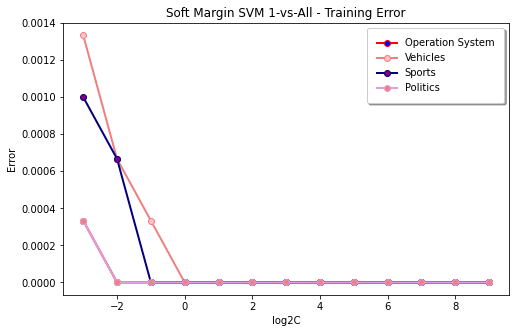

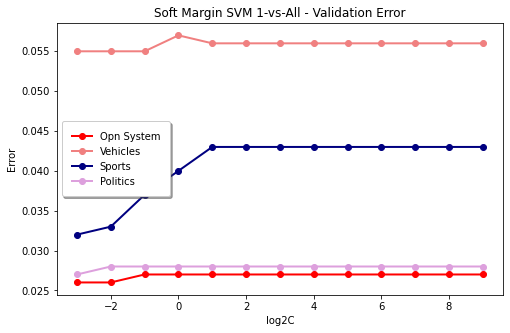

In [ ]:
#Plot soft margin training error for different C values on log scale
c_vals = np.array([0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0])
xaxis_logc = np.log2(c_vals)

# Note - the Operating Systems train error is not visbile across the c values as the values of error at the correspoding c are 0 other than the value of c at 0.125

plt.figure(num = 3, figsize=(8, 5))
plt.plot( xaxis_logc, np.array(list(sm_train_err_class1.values())), marker='.', markerfacecolor='blue', markersize=12, color='red', linewidth=2, label="Operation System")
plt.plot( xaxis_logc, np.array(list(sm_train_err_class2.values())), marker='.', markerfacecolor='pink', markersize=12, color='lightcoral', linewidth=2, label="Vehicles")
plt.plot( xaxis_logc, np.array(list(sm_train_err_class3.values())), marker='.', markerfacecolor='purple', markersize=12, color='navy', linewidth=2, label="Sports")
plt.plot( xaxis_logc, np.array(list(sm_train_err_class4.values())), marker='.', markerfacecolor='lightcoral', markersize=12, color='plum', linewidth=2, label="Politics")
plt.xlabel("log2C")
plt.ylabel("Error")
plt.title("Soft Margin SVM 1-vs-All - Training Error")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

plt.figure(num = 3, figsize=(8, 5))
plt.plot( xaxis_logc, np.array(list(sm_test_err_class1.values())), marker='.', markerfacecolor='red', markersize=12, color='red', linewidth=2, label="Opn System")
plt.plot( xaxis_logc, np.array(list(sm_test_err_class2.values())), marker='.', markerfacecolor='lightcoral', markersize=12, color='lightcoral', linewidth=2, label="Vehicles")
plt.plot( xaxis_logc, np.array(list(sm_test_err_class3.values())), marker='.', markerfacecolor='navy', markersize=12, color='navy', linewidth=2, label="Sports")
plt.plot( xaxis_logc, np.array(list(sm_test_err_class4.values())), marker='.', markerfacecolor='plum', markersize=12, color='plum', linewidth=2, label="Politics")
plt.xlabel("log2C")
plt.ylabel("Error")
plt.title("Soft Margin SVM 1-vs-All - Validation Error")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()



### Part-D. With the best C value chosen from part (b), learn four soft-margin classifiers again on the entire training set.
* Considering the best value of c to be 0.125, we are going to learn four 
soft-margin classifiers again on the entire training set
* Testing newly learned best classifiers on the test set similar to part (a)
* Comparing the test error rates to hard-margin classifiers on part (a) and then explaining which classifier works better?

In [ ]:
# Developing a soft margin classifier (SVM) with the best c value on the entire training set
def softmargin_best(xs_train, xs_test, ys_train, ys_test, slack):
  model = svm.SVC(kernel='linear', C=slack, probability=True) 
  model.fit(xs_train, ys_train)
  train_err = (1 - model.score(xs_train, ys_train))
  test_err = (1 - model.score(xs_test, ys_test))
  yhat_s = model.predict(xs_test)
  return train_err, test_err, yhat_s, model

def c_value(x,y):
  train_err = {}
  test_err = {}
  yhat = {}
  x_train, x_test, y_train, y_test = holdout_split(x,y)
  c = 0.125
  while c < 513:
    train, test, pred = softmargin(x_train, x_test, y_train, y_test, c)    
    train_err.update({c:train})
    test_err.update({c:test})
    yhat.update({c:pred})
    c = c + c

  print("Iteration successful!")
  return train_err, test_err, yhat

sm_mintrain_err_class1, sm_mintest_err_class1, sm_minyhat_class1, f1_d = softmargin_best(x1_train_dense, x1_test_dense, y1_train_class1, y1_test_class1, best_c)
sm_mintrain_err_class2, sm_mintest_err_class2, sm_minyhat_class2, f2_d = softmargin_best(x1_train_dense, x1_test_dense, y1_train_class2, y1_test_class2, best_c)
sm_mintrain_err_class3, sm_mintest_err_class3, sm_minyhat_class3, f3_d = softmargin_best(x1_train_dense, x1_test_dense, y1_train_class3, y1_test_class3, best_c)
sm_mintrain_err_class4, sm_mintest_err_class4, sm_minyhat_class4, f4_d = softmargin_best(x1_train_dense, x1_test_dense, y1_train_class4, y1_test_class4, best_c)

In [ ]:
# Calculating training & test error for the best value of C for each class

print('-'*70)
print("Soft-Margin SVM Training & Test Errors")
print('-'*70)
print('SMC training error for Operating Systems at best C:  ', sm_mintrain_err_class1)
print('SMC training error for Vehicles at best C: ', sm_mintrain_err_class2)
print('SMC training error for Sports at best C: ', sm_mintrain_err_class3)
print('SMC training error for Politics at best C: ', sm_mintrain_err_class4)
print('-'*70)
print('SMC test error for Operating Systems at best C: ', sm_mintest_err_class1)
print('SMC test error for Vehicles at best C: ', sm_mintest_err_class2)
print('SMC test error for Sports at best C: ', sm_mintest_err_class3)
print('SMC test error for Politics at best C: ', sm_mintest_err_class4)

----------------------------------------------------------------------
Soft-Margin SVM Training & Test Errors
----------------------------------------------------------------------
SMC training error for Operating Systems at best C:   0.00024999999999997247
SMC training error for Vehicles at best C:  0.0010000000000000009
SMC training error for Sports at best C:  0.0007500000000000284
SMC training error for Politics at best C:  0.00024999999999997247
----------------------------------------------------------------------
SMC test error for Operating Systems at best C:  0.03833333333333333
SMC test error for Vehicles at best C:  0.053749999999999964
SMC test error for Sports at best C:  0.0345833333333333
SMC test error for Politics at best C:  0.05833333333333335


In [ ]:
# Comparsion between soft-margin classifiers & hard-margin classifiers

print("Performance Comparison of SMC vs HMC:")
print('-'*70)
# Prediction & Performance of SMC Class:
sm_yhat = list()
for i in range(len(y1_test_class1)):
  if(sm_minyhat_class1[i] > sm_minyhat_class2[i] and sm_minyhat_class1[i] > sm_minyhat_class3[i] and sm_minyhat_class1[i] > sm_minyhat_class4[i]):
    sm_yhat.append(1)
  elif(sm_minyhat_class2[i] > sm_minyhat_class1[i] and sm_minyhat_class2[i] > sm_minyhat_class3[i] and sm_minyhat_class2[i] > sm_minyhat_class4[i]):
    sm_yhat.append(2)
  elif(sm_minyhat_class3[i] > sm_minyhat_class1[i] and sm_minyhat_class3[i] > sm_minyhat_class2[i] and sm_minyhat_class3[i] > sm_minyhat_class4[i]):
    sm_yhat.append(3)
  else:
    sm_yhat.append(4)
print('-'*70)
print("SoftMargin- SVM Classification Report: ")
targetNames = ['Operating Systems', 'Vehicles', 'Sports', 'Politics']
print(classification_report(y_test, sm_yhat, target_names = targetNames))
print('-'*70)
# Prediction & Performance of HMC Class:
hm_yhat = list()
for i in range(len(y1_test_class1)):
  if(yhat_class1[i] > yhat_class2[i] and yhat_class1[i] > yhat_class3[i] and yhat_class1[i] > yhat_class4[i]):
    hm_yhat.append(1)
  elif(yhat_class2[i] > yhat_class1[i] and yhat_class2[i] > yhat_class3[i] and yhat_class2[i] > yhat_class4[i]):
    hm_yhat.append(2)
  elif(yhat_class3[i] > yhat_class1[i] and yhat_class3[i] > yhat_class2[i] and yhat_class3[i] > yhat_class4[i]):
    hm_yhat.append(3)
  else:
    hm_yhat.append(4)
print('-'*70)
print("HardMargin- SVM Classification Report: ")
print(classification_report(y_test, hm_yhat, target_names = targetNames))



Performance Comparison of SMC vs HMC:
----------------------------------------------------------------------
----------------------------------------------------------------------
SoftMargin- SVM Classification Report: 
                   precision    recall  f1-score   support

Operating Systems       0.98      0.85      0.91       600
         Vehicles       0.96      0.83      0.89       600
           Sports       0.98      0.87      0.92       600
         Politics       0.71      0.98      0.82       600

         accuracy                           0.88      2400
        macro avg       0.91      0.88      0.89      2400
     weighted avg       0.91      0.88      0.89      2400

----------------------------------------------------------------------
----------------------------------------------------------------------
HardMargin- SVM Classification Report: 
                   precision    recall  f1-score   support

Operating Systems       0.97      0.84      0.90       600
    

In [ ]:
# Using ArgMax- combined model
pred1=f1_d.predict_proba(x1_test_dense)[:,1]
pred2=f2_d.predict_proba(x1_test_dense)[:,1]
pred3=f3_d.predict_proba(x1_test_dense)[:,1]
pred4=f4_d.predict_proba(x1_test_dense)[:,1]

predict_= np.concatenate((pred1.reshape((2400,1)), pred2.reshape((2400,1)),pred3.reshape((2400,1)),pred4.reshape((2400,1))), axis=1) #Using 2400 as the len(pred1) is 2400.
predict_= np.argmax(predict_, axis=1)+1 # adding 1 so that the indexes match

total_error_d = 1-accuracy_score(predict_, y1_test)

print("Overall Error of SMC: ", total_error_d)
print("Overall Error of HMC: ", total_error)

print("As the data cannot be linearly separated, soft-margin classifier ensured that data points close to the hyperplane are limited. Errors are reduced by decreasing misclassification through the accurate allocation of data points along the hyperplane. In hard-margin classifier however, data points are largely mis-classified therefore ensuing great errors.")

Overall Error of SMC:  0.08166666666666667
Overall Error of HMC:  0.0954166666666667
As the data cannot be linearly separated, soft-margin classifier ensured that data points close to the hyperplane are limited. Errors are reduced by decreasing misclassification through the accurate allocation of data points along the hyperplane. In hard-margin classifier however, data points are largely mis-classified therefore ensuing great errors.


### Part-E. Normalize Feature Vectors And Compare The Test Errors To Soft Margin Classifiers Done Before

So, In this part we are normalizing our Feature vectors X_train and X_test by dividing each feature with the L2 norm of the feature vector and as a result we get normalized feature vectors as X_train_norm and X_test_norm.

In [ ]:
# Define a function to normalize feature vectors 

def normalize_vectors(x_train,x_test):
  norm_x_train = normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)
  norm_x_test = normalize(x_test, norm='l2', axis=1, copy=True, return_norm=False)
  return norm_x_train,norm_x_test

# Building models using soft margin function defined in part c) on normalized data on each class
x1_train_dense_norm,x1_test_dense_norm = normalize_vectors(x1_train_dense,x1_test_dense)

train_err_norm_class1, test_err_norm_class1, yhat_norm_class1 = c_value(x1_train_dense_norm, y1_train_class1)
train_err_norm_class2, test_err_norm_class2, yhat_norm_class2 = c_value(x1_train_dense_norm, y1_train_class2)
train_err_norm_class3, test_err_norm_class3, yhat_norm_class3 = c_value(x1_train_dense_norm, y1_train_class3)
train_err_norm_class4, test_err_norm_class4, yhat_norm_class4 = c_value(x1_train_dense_norm, y1_train_class4)
  
#Calculating the average error on the validation data for the normalized feature vectors
print("\n")
print('-'*80)
print("Soft Margin Classifier Validation error with normalized vectors at different C values:")
print('-'*80)
validation_error_norm = {}
for c in c_vals:
  validation_error_norm.update({c:(test_err_norm_class1[c]+test_err_norm_class2[c]+test_err_norm_class3[c]+test_err_norm_class4[c])/4})
  print('Soft-Margin Validation error (With Normalization) at C = ',c,'is',validation_error_norm[c])
  
# Finding the best C value for normalized Soft Margin Classifier
print("\n"*2)
best_c_value_norm = min(validation_error_norm, key=validation_error_norm.get)
print("The validation error (With Normalization) is lowest  at C =", best_c_value_norm)
print("\n")



Iteration successful!
Iteration successful!
Iteration successful!
Iteration successful!


--------------------------------------------------------------------------------
Soft Margin Classifier Validation error with normalized vectors at different C values:
--------------------------------------------------------------------------------
Soft-Margin Validation error (With Normalization) at C =  0.125 is 0.14325
Soft-Margin Validation error (With Normalization) at C =  0.25 is 0.07674999999999998
Soft-Margin Validation error (With Normalization) at C =  0.5 is 0.04375000000000001
Soft-Margin Validation error (With Normalization) at C =  1.0 is 0.030000000000000027
Soft-Margin Validation error (With Normalization) at C =  2.0 is 0.02100000000000002
Soft-Margin Validation error (With Normalization) at C =  4.0 is 0.019000000000000017
Soft-Margin Validation error (With Normalization) at C =  8.0 is 0.02075000000000002
Soft-Margin Validation error (With Normalization) at C =  16.0 is 0.02100

Building Graphs

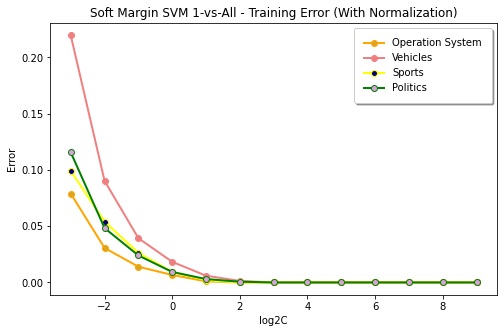

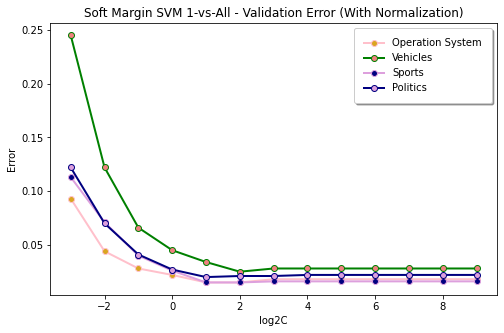

In [ ]:
# Plot graphs of training and test errors on normalized data for different c value on log scale 
plt.figure(num = 3, figsize=(8, 5))
plt.plot( xaxis_logc, np.array(list(train_err_norm_class1.values())), marker='.', markerfacecolor='goldenrod', markersize=12, color='orange', linewidth=2, label="Operation System")
plt.plot( xaxis_logc, np.array(list(train_err_norm_class2.values())), marker='.', markerfacecolor='lightcoral', markersize=12, color='lightcoral', linewidth=2, label="Vehicles")
plt.plot( xaxis_logc, np.array(list(train_err_norm_class3.values())), marker='.', markerfacecolor='navy', markersize=12, color='yellow', linewidth=2, label="Sports")
plt.plot( xaxis_logc, np.array(list(train_err_norm_class4.values())), marker='.', markerfacecolor='plum', markersize=12, color='green', linewidth=2, label="Politics")
plt.xlabel("log2C")
plt.ylabel("Error")
plt.title("Soft Margin SVM 1-vs-All - Training Error (With Normalization)")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()

plt.figure(num = 3, figsize=(8, 5))
plt.plot( xaxis_logc, np.array(list(test_err_norm_class1.values())), marker='.', markerfacecolor='goldenrod', markersize=12, color='pink', linewidth=2, label="Operation System")
plt.plot( xaxis_logc, np.array(list(test_err_norm_class2.values())), marker='.', markerfacecolor='lightcoral', markersize=12, color='green', linewidth=2, label="Vehicles")
plt.plot( xaxis_logc, np.array(list(test_err_norm_class3.values())), marker='.', markerfacecolor='navy', markersize=12, color='plum', linewidth=2, label="Sports")
plt.plot( xaxis_logc, np.array(list(test_err_norm_class4.values())), marker='.', markerfacecolor='plum', markersize=12, color='navy', linewidth=2, label="Politics")
plt.xlabel("log2C")
plt.ylabel("Error")
plt.title("Soft Margin SVM 1-vs-All - Validation Error (With Normalization)")
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.show()


In [ ]:
#Soft-Margin 1-vs-All Classifier at Best C

sm_mintrain_err_norm_class1, sm_mintest_err_norm_class1, sm_minyhat_norm_class1, f1_e = softmargin_best(x1_train_dense_norm, x1_test_dense_norm, y1_train_class1, y1_test_class1, best_c_value_norm)
sm_mintrain_err_norm_class2, sm_mintest_err_norm_class2, sm_minyhat_norm_class2, f2_e = softmargin_best(x1_train_dense_norm, x1_test_dense_norm, y1_train_class2, y1_test_class2, best_c_value_norm)
sm_mintrain_err_norm_class3, sm_mintest_err_norm_class3, sm_minyhat_norm_class3, f3_e = softmargin_best(x1_train_dense_norm, x1_test_dense_norm, y1_train_class3, y1_test_class3, best_c_value_norm)
sm_mintrain_err_norm_class4, sm_mintest_err_norm_class4, sm_minyhat_norm_class4, f4_e = softmargin_best(x1_train_dense_norm, x1_test_dense_norm, y1_train_class4, y1_test_class4, best_c_value_norm)

print('-'*70)
print("Soft-Margin SVM Training & Test Errors with Normalization")
print('-'*70)
print('SMC training error for Operating Systems at best C:  ', sm_mintrain_err_norm_class1)
print('SMC training erroor for Vehicles at best C: ', sm_mintrain_err_norm_class2)
print('SMC training error for Sports at best C: ', sm_mintrain_err_norm_class3)
print('SMC training error for Politics at best C: ', sm_mintrain_err_norm_class4)
print('-'*70)
print('SMC test error for Operating Systems at best C: ', sm_mintest_err_norm_class1)
print('SMC test error for Vehicles at best C: ', sm_mintest_err_norm_class2)
print('SMC test error for Sports at best C: ', sm_mintest_err_norm_class3)
print('SMC test error for Politics at best C: ', sm_mintest_err_norm_class4)


----------------------------------------------------------------------
Soft-Margin SVM Training & Test Errors with Normalization
----------------------------------------------------------------------
SMC training error for Operating Systems at best C:   0.00024999999999997247
SMC training erroor for Vehicles at best C:  0.0014999999999999458
SMC training error for Sports at best C:  0.0
SMC training error for Politics at best C:  0.00024999999999997247
----------------------------------------------------------------------
SMC test error for Operating Systems at best C:  0.032916666666666705
SMC test error for Vehicles at best C:  0.03416666666666668
SMC test error for Sports at best C:  0.026249999999999996
SMC test error for Politics at best C:  0.029166666666666674


In [ ]:
#Soft-Margin Classifier Class Prediction & Performance:
sm_yhat_norm = list()
for i in range(len(y1_test_class1)):
  if(sm_minyhat_norm_class1[i] > sm_minyhat_norm_class2[i] and sm_minyhat_norm_class1[i] > sm_minyhat_norm_class3[i] and sm_minyhat_norm_class1[i] > sm_minyhat_norm_class4[i]):
    sm_yhat_norm.append(1)
  elif(sm_minyhat_norm_class2[i] > sm_minyhat_norm_class1[i] and sm_minyhat_norm_class2[i] > sm_minyhat_norm_class3[i] and sm_minyhat_norm_class2[i] > sm_minyhat_norm_class4[i]):
    sm_yhat_norm.append(2)
  elif(sm_minyhat_norm_class3[i] > sm_minyhat_norm_class1[i] and sm_minyhat_norm_class3[i] > sm_minyhat_norm_class2[i] and sm_minyhat_norm_class3[i] > sm_minyhat_norm_class4[i]):
    sm_yhat_norm.append(3)
  else:
    sm_yhat_norm.append(4)
print('-'*70)
print("Performance Comparison of SoftMargin SVM vs Soft-Margin SVM with Normalization:")
print("SoftMargin SVM- Classification Report: ")
print(classification_report(y_test, sm_yhat, target_names = targetNames))
print('-'*70)
print("SoftMargin SVM- Classification Report with Normalization: ")
print(classification_report(y_test, sm_yhat_norm, target_names = targetNames))
print('-'*70)
print("The test error of a soft-margin binary classifier for class 4-vs-all with and without normalization ")
print("\nSMC test error for Operating Systems (with Normalization) at best C: ", sm_mintest_err_norm_class1)
print("SMC test error for Operating Systems (without Normalization) at best C: ", sm_mintest_err_class1)
print("\nSMC test error for Vehicles (with Normalization) at best C: ", sm_mintest_err_norm_class2)
print("SMC test error for Vehicles (without Normalization) at best C: ", sm_mintest_err_class2)
print("\nSMC test error for Sports (with Normalization) at best C: ", sm_mintest_err_norm_class3)
print("SMC test error for Sports (without Normalization) at best C: ", sm_mintest_err_class3)
print("\nSMC test error for Politics (with Normalization) at best C: ", sm_mintest_err_norm_class4)
print("SMC test error for Politics (without Normalization) at best C: ", sm_mintest_err_class4)

----------------------------------------------------------------------
Performance Comparison of SoftMargin SVM vs Soft-Margin SVM with Normalization:
SoftMargin SVM- Classification Report: 
                   precision    recall  f1-score   support

Operating Systems       0.98      0.85      0.91       600
         Vehicles       0.96      0.83      0.89       600
           Sports       0.98      0.87      0.92       600
         Politics       0.71      0.98      0.82       600

         accuracy                           0.88      2400
        macro avg       0.91      0.88      0.89      2400
     weighted avg       0.91      0.88      0.89      2400

----------------------------------------------------------------------
SoftMargin SVM- Classification Report with Normalization: 
                   precision    recall  f1-score   support

Operating Systems       0.99      0.88      0.93       600
         Vehicles       0.98      0.88      0.93       600
           Sports       0.

In [ ]:
# Using ArgMax- combined model
pred1=f1_e.predict_proba(x1_test_dense)[:,1]
pred2=f2_e.predict_proba(x1_test_dense)[:,1]
pred3=f3_e.predict_proba(x1_test_dense)[:,1]
pred4=f4_e.predict_proba(x1_test_dense)[:,1]

pred_=np.concatenate((pred1.reshape((2400,1)), pred2.reshape((2400,1)),pred3.reshape((2400,1)),pred4.reshape((2400,1))), axis=1)
pred_=np.argmax(pred_, axis=1)+1

total_error_e = 1-accuracy_score(pred_, y1_test)


print("Overall Error SMC without Normalization: ", total_error_d)
print("Overall Error SMC with Normalization: ", total_error_e)

Overall Error SMC without Normalization:  0.08166666666666667
Overall Error SMC with Normalization:  0.060833333333333295


**CAN YOU CHECK WHY total_error_d and total_error_e HAVE THE SAME VALUE. I CAN'T FUGURE OUT.**

In [ ]:
print( "Lower error rates are produced when soft margin classifiers are utilised with normalised feature vectors. The consequence of non-recurring costs are not included in the statistical normalised feature vector. Without the use of normalised feature vectors when calculating soft margin classifiers depicts a great degree of error rates. ")

Lower error rates are produced when soft margin classifiers are utilised with normalised feature vectors. The consequence of non-recurring costs are not included in the statistical normalised feature vector. Without the use of normalised feature vectors when calculating soft margin classifiers depicts a great degree of error rates. 


## **Part F** - Now what we are performing in this part is mentioned below:

So far ,We have trained 1-vs-all classifiers - binary and multiclass. Now here we'll perform 1-vs-1, where we will train all 4C2 binary classifiers distinguishing between every pair of classes using OneVsOneClassifier. Since we have 4 classes, this classifier trains all (4C2 = 6) binary classifiers to classify every pair of classes. This classifier then picks the class with higher votes.

We then Compare the accuracy of 1-vs-1 and 1-vs-all. Accuracy should be measured fairly between the two methods using normalized features as in part (e) and optimal C parameters as in part (b).

In [ ]:
print ('Starting part F:')
def filterCsrData(filename,l1,l2):
  with open(filename) as datafile:
    count=0
    col=[len(mapping)-1]
    row=[0]
    data=[0]
    y=[]
    for line in datafile:
      # Split your line into a list of words deliminated by the space.
      elements = line.split(' ')
      if int(elements[0]) in (l1,l2):
        label, features = elements[0], elements[1:]
        yA = [float(label)]
        colA = [i.split(':', 1)[0] for i in elements[1:]]
        colA = [int(x) - 1 for x in colA]
        dataA = [i.split(':', 1)[1] for i in elements[1:]]
        dataA = [float(x) for x in dataA]
        rowA = [count]*(len(colA))
        col = col + colA
        data = data + dataA
        row = row + rowA
        y = y + yA
        count += 1

    y = np.array(y)
    X = (csr_matrix((data, (row, col))))

    return X,y

X_train12,y_train12=filterCsrData('articles.train',1,2)
X_train13,y_train13=filterCsrData('articles.train',1,3)
X_train14,y_train14=filterCsrData('articles.train',1,4)
X_train23,y_train23=filterCsrData('articles.train',2,3)
X_train24,y_train24=filterCsrData('articles.train',2,4)
X_train34,y_train34=filterCsrData('articles.train',3,4)

y_train_12 = np.array([1 if y==1 else -1 for y in y_train12])
y_train_13 = np.array([1 if y==1 else -1 for y in y_train13])
y_train_14 = np.array([1 if y==1 else -1 for y in y_train14])
y_train_23 = np.array([1 if y==2 else -1 for y in y_train23])
y_train_24 = np.array([1 if y==2 else -1 for y in y_train24])
y_train_34 = np.array([1 if y==3 else -1 for y in y_train34])

X_train12,X_train23=normalize_vectors(X_train12,X_train23)
X_train13,X_train24=normalize_vectors(X_train13,X_train24)
X_train14,X_train34=normalize_vectors(X_train14,X_train34)

print("We are taking the c=4, as The validation error (With Normalization) is lowest  at C = 4.0")


model_12 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model_12.fit(X_train12, y_train_12)
yhat_12 = model_12.predict(x_test)
model_13 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model_13.fit(X_train13, y_train_13)
yhat_13 = model_13.predict(x_test)
model_14 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model_14.fit(X_train14, y_train_14)
yhat_14 = model_14.predict(x_test)
model_23 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model_23.fit(X_train23, y_train_23)
yhat_23 = model_23.predict(x_test)
model_24 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model_24.fit(X_train24, y_train_24)
yhat_24 = model_24.predict(x_test)
model_34 = svm.SVC(kernel='linear', C=4.0, decision_function_shape='ovo')
model_34.fit(X_train34, y_train_34)
yhat_34 = model_34.predict(x_test)

y_train_12_mod_val = np.array([1 if y==1 else 2 for y in yhat_12])
y_train_13_mod_val = np.array([1 if y==1 else 3 for y in yhat_13])
y_train_14_mod_val = np.array([1 if y==1 else 4 for y in yhat_14])
y_train_23_mod_val = np.array([2 if y==1 else 3 for y in yhat_23])
y_train_24_mod_val = np.array([2 if y==1 else 4 for y in yhat_24])
y_train_34_mod_val = np.array([3 if y==1 else 4 for y in yhat_34])

yhat_array_val = np.array([y_train_12_mod_val,y_train_13_mod_val,y_train_14_mod_val,y_train_23_mod_val,y_train_24_mod_val,y_train_34_mod_val])

y_hat_mapping = pd.DataFrame(yhat_array_val)

y_hat_OnetoOne=y_hat_mapping.mode().iloc[0].to_numpy(dtype='int64')

print("*"*80)
print("Soft-Margin SVM Classification Report: ")
print("*"*80)
print(classification_report(y_test, y_hat_OnetoOne, target_names=targetNames))

print("The Accuracy for One vs One multiclass classifier is *91%*")
print("Soft-Margin SVM Classification Report (With Normalization) (refer to output in Part-E), the accuracy of the One vs all multiclass classifer is *92%*. Based on our ")

Starting part F:
We are taking the c=4, as The validation error (With Normalization) is lowest  at C = 4.0
********************************************************************************
Soft-Margin SVM Classification Report: 
********************************************************************************
                   precision    recall  f1-score   support

Operating Systems       0.93      0.90      0.92       600
         Vehicles       0.95      0.86      0.90       600
           Sports       0.96      0.91      0.94       600
         Politics       0.81      0.96      0.88       600

         accuracy                           0.91      2400
        macro avg       0.92      0.91      0.91      2400
     weighted avg       0.92      0.91      0.91      2400

The Accuracy for One vs One multiclass classifier is *91%*
Soft-Margin SVM Classification Report (With Normalization) (refer to output in Part-E), the accuracy of the One vs all multiclass classifer is *92%*. Based o